In [1]:
%pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

import keras

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


####Loading Data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# normalize images
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 168s 1us/step


In [4]:
import jax
from keras import models, layers
jax.devices()

[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0)]

#LeNET_CIFAR


In [5]:
from keras import models, layers

#structure definition
leNet = keras.Sequential(
    [layers.Input(shape=(32,32,3), name='input'),

     #layers.MaxPooling2D(pool_size=5, strides=1, padding='same',name='avgpool_extra_1'),

     layers.Conv2D(filters=6, kernel_size=5, padding='same', name='2dconv_1'),
     #layers.BatchNormalization(),
     layers.Activation(activation='sigmoid'),
     layers.Conv2D(filters=6, kernel_size=3, padding='same', name='2dconv_extra'),
     #layers.BatchNormalization(momentum=0.3),
     layers.Activation(activation='sigmoid'),
     layers.MaxPooling2D(pool_size=2, strides=2, padding='same',name='avgpool_1'),

     layers.Conv2D(filters=16, kernel_size=5, padding='same',name='2dconv_2'),
     #layers.BatchNormalization(),
     layers.Activation(activation='sigmoid'),
     layers.AveragePooling2D(pool_size=2,strides=2, padding='same',name='avgpool_2'),

     layers.Flatten(),

     #layers.Dense(120, activation='sigmoid', name='dense_1'),
     #layers.Dropout(0.5),
     #layers.Dense(84, activation='sigmoid', name='dense_2'),
     #layers.Dropout(0.5),


     layers.Dense(120, name='dense_1'),
     layers.LayerNormalization(),
     layers.Dropout(0.7),
     layers.Activation('sigmoid'),
     layers.Dense(84, name='dense_2'),
     layers.LayerNormalization(),
     layers.Dropout(0.5),
     layers.Activation('sigmoid'),

     layers.Dense(10, activation='softmax',name='preds')
     ]
)

opt = keras.optimizers.Nadam(0.0003)
leNet.compile(optimizer= opt,
              loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy']
              )

history_0 = leNet.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=200,
    validation_split = 0.2)

leNet.save('CNN_leNet_CIFAR.keras')

Epoch 1/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 132ms/step - accuracy: 0.1010 - loss: 2.3314 - val_accuracy: 0.1022 - val_loss: 2.3106
Epoch 2/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1014 - loss: 2.3145 - val_accuracy: 0.0980 - val_loss: 2.3062
Epoch 3/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0992 - loss: 2.3114 - val_accuracy: 0.0980 - val_loss: 2.3081
Epoch 4/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1024 - loss: 2.3080 - val_accuracy: 0.0980 - val_loss: 2.3048
Epoch 5/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1001 - loss: 2.3083 - val_accuracy: 0.0980 - val_loss: 2.3049
Epoch 6/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0978 - loss: 2.3076 - val_accuracy: 0.1022 - val_loss: 2.3059
Epoch 7/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0988 - loss: 2.3065 - val_accuracy: 0.1025 - val_loss: 2.3056
Epoch 8/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1016 - loss: 2.3053 - val_a

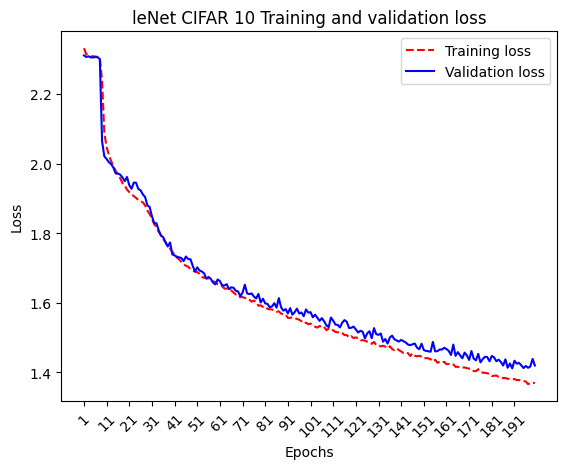

In [6]:
import matplotlib.pyplot as plt


#training vs accuracy loss
loss = history_0.history['loss']
val_loss = history_0.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('leNet CIFAR 10 Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(epochs[::10], rotation=45)
plt.ylabel('Loss')
plt.legend()
plt.show()

# top 3 training vs validaton accuracy


####LeNet Notes:

In [7]:
leNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 2dconv_1 (Conv2D)               │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_extra (Conv2D)           │ (None, 32, 32, 6)      │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool_1 (MaxPooling2D)        │ (None, 16, 16, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_2 (Conv2D)               │ (None, 16, 16, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool_2 (AveragePooling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │       123,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 120)            │           240 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 84)             │           168 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preds (Dense)                   │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,875 (1.57 MB)

 Trainable params: 137,624 (537.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 275,251 (1.05 MB)

In [8]:
keras.utils.plot_model(leNet,'leNet.png',
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#AlexNet_CIFAR


In [9]:
from keras import models, layers

#structure definition
AlexNet = keras.Sequential(
    [layers.Input(shape=(32,32,3), name='input'),

     layers.Conv2D(filters=32, kernel_size=7, activation='relu', padding='same', name='2dconv_1'),
     layers.MaxPooling2D(pool_size=3, strides=2, name='maxpool_1'),

     layers.Conv2D(filters=96, kernel_size=5, activation='relu', padding='same',name='2dconv_2'),
     layers.MaxPooling2D(pool_size=3, strides=2, name='maxpool_2'),


     #batchnorm experiment
     layers.Conv2D(filters=128, kernel_size=3, padding='same',name='2dconv_3'),
     #layers.BatchNormalization(momentum=0.5),
     layers.Activation('relu'),

     layers.Conv2D(filters=128, kernel_size=3, padding='same',name='2dconv_4'),
     #layers.BatchNormalization(momentum=0.5),
     layers.Activation('relu'),


     layers.Conv2D(filters=96, kernel_size=3, activation='relu', padding='same',name='2dconv_5'),
     layers.MaxPooling2D(pool_size=3, strides=2, name='maxpool_3'),

     layers.Flatten(),

     layers.Dense(512, name='dense_1'),
     layers.Dropout(0.7),
     layers.Activation('relu'),

     layers.Dense(512, activation='relu', name='dense_2'),
     layers.Dropout(0.7),
     layers.Activation('relu'),


     layers.Dense(10, activation='softmax',name='preds')
     ]
)

opt = keras.optimizers.Nadam()#RMSprop(learning_rate=0.0003, momentum=0.7)#SGD(momentum=0.9)
AlexNet.compile(optimizer= opt,
              loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'] #  keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top_3_accuracy')
              )

history_1 = AlexNet.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=11,
    validation_split = 0.2)

AlexNet.save('CNN_AlexNet_CIFAR.keras')

Epoch 1/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 284ms/step - accuracy: 0.1919 - loss: 2.0896 - val_accuracy: 0.3351 - val_loss: 1.7467
Epoch 2/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4058 - loss: 1.5951 - val_accuracy: 0.4809 - val_loss: 1.4065
Epoch 3/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5207 - loss: 1.3412 - val_accuracy: 0.5803 - val_loss: 1.1966
Epoch 4/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5821 - loss: 1.1947 - val_accuracy: 0.5487 - val_loss: 1.2694
Epoch 5/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6235 - loss: 1.0877 - val_accuracy: 0.6298 - val_loss: 1.0436
Epoch 6/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6586 - loss: 0.9960 - val_accuracy: 0.6470 - val_loss: 1.0233
Epoch 7/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6851 - loss: 0.9171 - val_accuracy: 0.6612 - val_loss: 0.9880
Epoch 8/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7114 - loss: 0.8475 - val_accuracy

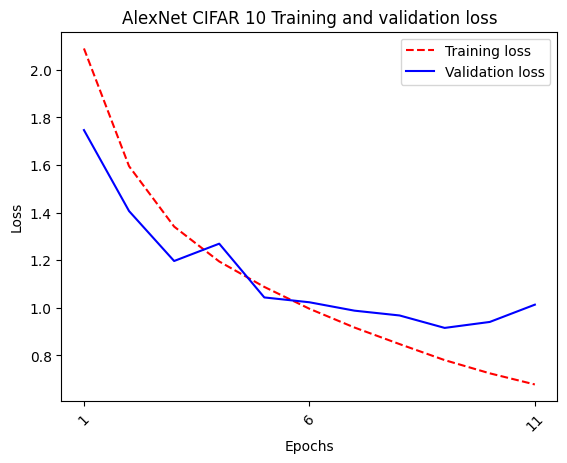

In [10]:
import matplotlib.pyplot as plt


#training vs accuracy loss
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('AlexNet CIFAR 10 Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(epochs[::5], rotation=45)
plt.ylabel('Loss')
plt.legend()
plt.show()

# top 3 training vs validaton accuracy


####AlexNet Notes:

In [11]:
AlexNet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 2dconv_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_2 (Conv2D)               │ (None, 15, 15, 96)     │        76,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_3 (Conv2D)               │ (None, 7, 7, 128)      │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_5 (Conv2D)               │ (None, 7, 7, 96)       │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 864)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       442,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preds (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,483,873 (13.29 MB)

 Trainable params: 1,161,290 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,322,583 (8.86 MB)

In [12]:
keras.utils.plot_model(AlexNet,'AlexNet.png',
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#VGG16_CIFAR

In [13]:
from keras import models, layers

#structure definition
VGG16 = keras.Sequential(
    [layers.Input(shape=(32,32,3), name='input'),

     layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same', name='2dconv_1'),
     layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', name='2dconv_2'),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_1'),

     layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same',name='2dconv_3'),
     layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same',name='2dconv_4'),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_2'),

     layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same',name='2dconv_5'),
     layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same',name='2dconv_6'),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_3'),

     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_7'),
     layers.BatchNormalization(momentum=0.5),
     layers.Activation('relu'),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_8'),
     layers.BatchNormalization(momentum=0.5),
     layers.Activation('relu'),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_9'),
     layers.BatchNormalization(momentum=0.5),
     layers.Activation('relu'),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_4'),

     layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same',name='2dconv_10'),
     layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same',name='2dconv_11'),
     layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same',name='2dconv_12'),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_5'),

     layers.Flatten(),

     layers.Dense(512, name='dense_1'),
     layers.Dropout(0.7),
     layers.Activation('relu'),
     layers.Dense(256, name='dense_2'),
     layers.Dropout(0.7),
     layers.Activation('relu'),

     layers.Dense(10, activation='softmax',name='preds')
     ]
)

opt= keras.optimizers.Adam(learning_rate=0.0001)
VGG16.compile(optimizer= opt,
              loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'] #  keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top_3_accuracy')
              )

history_2 = VGG16.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=8,
    validation_split = 0.2)

VGG16.save('CNN_VGG16_CIFAR.keras')

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.2269 - loss: 2.0371 - val_accuracy: 0.3701 - val_loss: 1.6573
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4082 - loss: 1.6055 - val_accuracy: 0.5210 - val_loss: 1.3379
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5288 - loss: 1.3524 - val_accuracy: 0.5908 - val_loss: 1.1293
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5944 - loss: 1.1851 - val_accuracy: 0.5902 - val_loss: 1.1875
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6483 - loss: 1.0440 - val_accuracy: 0.6521 - val_loss: 1.0035
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6900 - loss: 0.9210 - val_accuracy: 0.6711 - val_loss: 0.9651
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7325 - loss: 0.8066 - val_accuracy: 0.6739 - val_loss: 0.9644
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7706 - loss: 0.7084 - val_accuracy: 0.6980 

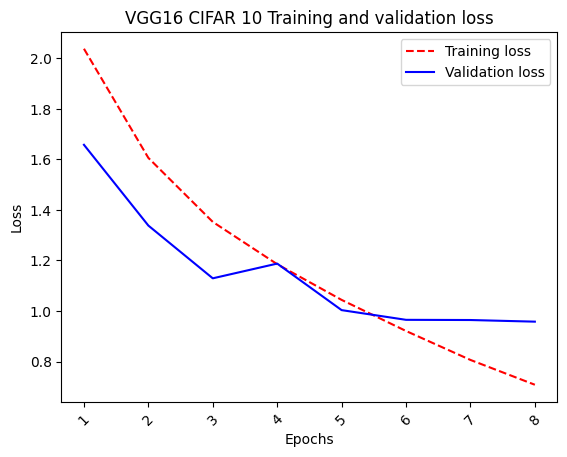

In [14]:
import matplotlib.pyplot as plt


#training vs accuracy loss
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('VGG16 CIFAR 10 Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(epochs[::1], rotation=45)
plt.ylabel('Loss')
plt.legend()
plt.show()

# top 3 training vs validaton accuracy


####VGG16 Notes:

In [15]:
VGG16.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 2dconv_1 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_8 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_9 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_4 (MaxPooling2D)        │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_10 (Conv2D)              │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_11 (Conv2D)              │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_12 (Conv2D)              │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_5 (MaxPooling2D)        │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 11,404,928 (43.51 MB)

 Trainable params: 3,801,130 (14.50 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 7,602,262 (29.00 MB)

In [16]:
keras.utils.plot_model(VGG16,'VGG16.png',
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#VGG19_CIFAR

In [17]:
from keras import models, layers

#structure definition
VGG19 = keras.Sequential(
    [layers.Input(shape=(32,32,3), name='input'),

     layers.Conv2D(filters=32, kernel_size=3, padding='same', name='2dconv_1'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=32, kernel_size=3, padding='same', name='2dconv_2'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_1'),


     layers.Conv2D(filters=64, kernel_size=3, padding='same',name='2dconv_3'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=64, kernel_size=3, padding='same',name='2dconv_4'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_2'),


     layers.Conv2D(filters=128, kernel_size=3, padding='same',name='2dconv_5'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=128, kernel_size=3, padding='same',name='2dconv_6'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_3'),


     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_7'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_8'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_9'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_10'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_4'),


     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_11'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_12'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_13'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.Conv2D(filters=256, kernel_size=3, padding='same',name='2dconv_14'),
     layers.BatchNormalization(momentum=0.5),
     layers.ReLU(),
     layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool_5'),

     layers.Flatten(),

     layers.Dense(512, name='dense_1'),
     layers.Dropout(0.3),
     layers.ReLU(),

     layers.Dense(170, name='dense_2'),
     layers.Dropout(0.5),
     layers.ReLU(),


     layers.Dense(10, activation='softmax',name='preds')
     ]
)

opt= keras.optimizers.RMSprop(momentum=0.95, learning_rate=0.0001)#Nadam(learning_rate=0.0003)#learning_rate=0.0003)
VGG19.compile(optimizer= opt,
              loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'] #  keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top_3_accuracy')
              )

history_3 = VGG19.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=14,
    validation_split = 0.2)

VGG19.save('CNN_VGG19_CIFAR.keras')

Epoch 1/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 177ms/step - accuracy: 0.2673 - loss: 1.8706 - val_accuracy: 0.4018 - val_loss: 1.5303
Epoch 2/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4530 - loss: 1.4339 - val_accuracy: 0.4951 - val_loss: 1.3433
Epoch 3/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5728 - loss: 1.1641 - val_accuracy: 0.5980 - val_loss: 1.0867
Epoch 4/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6339 - loss: 1.0229 - val_accuracy: 0.6841 - val_loss: 0.9049
Epoch 5/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.8831 - val_accuracy: 0.7047 - val_loss: 0.8386
Epoch 6/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.7718 - val_accuracy: 0.7247 - val_loss: 0.8024
Epoch 7/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.6728 - val_accuracy: 0.7712 - val_loss: 0.7097
Epoch 8/14
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: 0.5831 - val_accuracy:

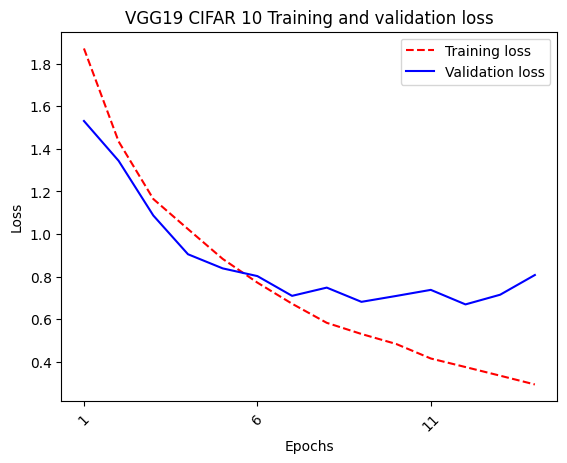

In [18]:
import matplotlib.pyplot as plt


#training vs accuracy loss
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('VGG19 CIFAR 10 Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(epochs[::5], rotation=45)
plt.ylabel('Loss')
plt.legend()
plt.show()

# top 3 training vs validaton accuracy


####VGG19 Notes:

In [19]:
VGG19.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 2dconv_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2dconv_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,16

 Total params: 14,819,690 (56.53 MB)

 Trainable params: 4,938,232 (18.84 MB)

 Non-trainable params: 4,992 (19.50 KB)

 Optimizer params: 9,876,466 (37.68 MB)

In [20]:
keras.utils.plot_model(VGG19,'VGG19.png',
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#GoogleNet_CIFAR

In [21]:
from keras import models, layers

# structure of googlenet learnt from:https://www.geeksforgeeks.org/machine-learning/understanding-googlenet-model-cnn-architecture/

#param: x is input, all other variables represent the number of filters
def inception_block(x, f1, f3_in,f3_out, f5_in, f5_out,fpool_out ):

    path1 = layers.Conv2D(f1, 1, padding='same')(x)
    path1 = layers.BatchNormalization()(path1)
    path1 = layers.ReLU()(path1)

    path2 = layers.Conv2D(f3_in, 1, padding='same')(x)
    path2 = layers.BatchNormalization()(path2)
    path2 = layers.ReLU()(path2)
    path2 = layers.Conv2D(f3_out, 3, padding='same')(path2)
    path2 = layers.BatchNormalization()(path2)
    path2 = layers.ReLU()(path2)

    path3 = layers.Conv2D(f5_in, 1, padding='same')(x)
    path3 = layers.BatchNormalization()(path3)
    path3 = layers.ReLU()(path3)
    path3 = layers.Conv2D(f5_out, 5, padding='same')(path3)
    path3 = layers.BatchNormalization()(path3)
    path3 = layers.ReLU()(path3)

    path4 = layers.MaxPooling2D(3, strides=1, padding='same')(x)
    path4 = layers.Conv2D(fpool_out, 1, padding='same')(path4)
    path4 = layers.BatchNormalization()(path4)
    path4 = layers.ReLU()(path4)

    return layers.Concatenate()([path1, path2, path3, path4])


def auxiliary_classifier (x, num_classes):
  x = layers.AveragePooling2D(pool_size=(5,5), strides=1, padding='same')(x)
  x = layers.Conv2D(filters=128, kernel_size=1, padding='same',activation='relu')(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation = 'relu')(x)
  x = layers.Dropout(0.7)(x)
  x = layers.Dense(num_classes,activation='softmax')(x)

  return x

def build_GoogleNet(num_classes):
  inputs = layers.Input(shape=(32,32,3))

  x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', name='2dconv_1')(inputs)
  x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', name='2dconv_2')(x)

  x = layers.MaxPooling2D(pool_size= (2,2), strides=2, padding='same', name='maxpool_1')(x)

  x = layers.Conv2D(filters=192, kernel_size= 3, strides=1, padding='same', activation='relu', name='2dconv_3')(x)

  x = layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same', name='maxpool_2')(x)

  x = inception_block(x,32,48,64,8,16,16) #inception 3a
  x = inception_block(x,64,64,96,16,48,32) # inception 3b

  #x = inception_block(x,64,96,128,16,32,32) #inception 3a
  #x = inception_block(x,128,128,192,32,96,64) # inception 3b

  x = layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same',name= 'maxpool_3')(x)

  x = inception_block(x, 96,48,104,8,24,32) #inception 4a

  #x = inception_block(x, 192,96,208,16,48,64) #inception 4a

  aux_1 = auxiliary_classifier(x, num_classes)
  aux_1 = layers.Activation('linear', name='aux1')(aux_1)

  x = inception_block(x,80,56,112,12,32,32) # inception 4b
  #x = inception_block(x, 64,64,128,12,32,32) #inception 4c
  x = inception_block(x,56,72,144,16,32,32) # inception 4d

  #x = inception_block(x,160,112,224,24,64,64) # inception 4b
  #x = inception_block(x, 128,128,256,24,64,64) #inception 4c
  #x = inception_block(x,112,144,288,32,64,64) # inception 4d

  aux_2 = auxiliary_classifier(x, num_classes)
  aux_2 = layers.Activation('linear', name='aux2')(aux_2) # auxiliary classifcation

  x = inception_block(x, 128,80,160,16,64,64) #inception 4e

  #x = inception_block(x, 256,160,320,32,128,128) #inception 4e

  x = layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same',name= 'maxpool_4')(x)

  #x = inception_block(x, 128,80,160,16,64,64) #inception 5a
  x = inception_block(x, 192,96,192,24,64,64) # inception 5b

  #x = inception_block(x, 256,160,320,32,128,128) #inception 5a
  #x = inception_block(x, 384,192,384,48,128,128) # inception 5b

  x = layers.GlobalAveragePooling2D(name='avgpool_1')(x)

  x = layers.Dropout(0.4)(x)

  outputs = layers.Dense(num_classes, activation='softmax', name = 'preds') (x)


  model = keras.Model(inputs, [outputs,aux_1,aux_2])

  return model


GoogleNet = build_GoogleNet(num_classes=10)

opt = keras.optimizers.Nadam(0.0003)
GoogleNet.compile(optimizer= opt,
              loss={
                    'preds': 'sparse_categorical_crossentropy',
                    'aux1': 'sparse_categorical_crossentropy',
                    'aux2': 'sparse_categorical_crossentropy'
                },
              loss_weights={'preds': 1.0,  'aux1': 0.3, 'aux2': 0.3},
              metrics= {'preds': ['accuracy'] }
              )

history_4 = GoogleNet.fit(
    x_train,
    [y_train, y_train, y_train],
    batch_size=256,
    epochs=20,
    validation_split = 0.2)

GoogleNet.save('CNN_GoogleNet_FASHION_MNIST.keras')

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 306ms/step - aux1_loss: 1.8346 - aux2_loss: 1.8233 - loss: 2.8923 - preds_accuracy: 0.3489 - preds_loss: 1.7949 - val_aux1_loss: 3.3968 - val_aux2_loss: 3.1333 - val_loss: 4.8417 - val_preds_accuracy: 0.0968 - val_preds_loss: 2.8827
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - aux1_loss: 1.4329 - aux2_loss: 1.3799 - loss: 2.1681 - preds_accuracy: 0.5229 - preds_loss: 1.3243 - val_aux1_loss: 4.0339 - val_aux2_loss: 4.3998 - val_loss: 6.9226 - val_preds_accuracy: 0.1253 - val_preds_loss: 4.3925
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - aux1_loss: 1.2291 - aux2_loss: 1.1609 - loss: 1.8122 - preds_accuracy: 0.6080 - preds_loss: 1.0952 - val_aux1_loss: 2.6213 - val_aux2_loss: 2.6301 - val_loss: 4.3884 - val_preds_accuracy: 0.2473 - val_preds_loss: 2.8130
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - aux1_loss: 1.0830 - aux2_loss: 0.9946 - loss: 1.5402 - preds_accuracy: 0.6719 - preds_loss: 0.9170 - val_aux1_loss: 1.640

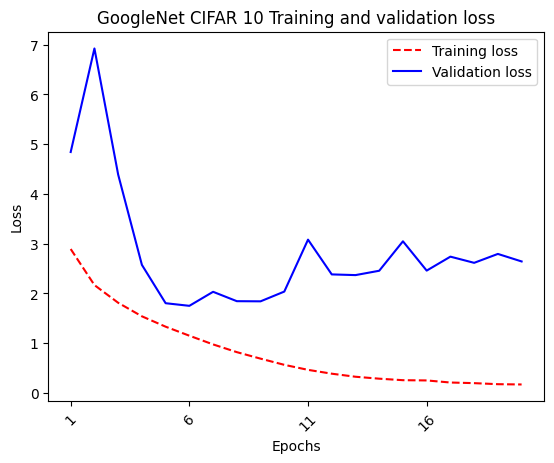

In [22]:
import matplotlib.pyplot as plt


#training vs accuracy loss
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('GoogleNet CIFAR 10 Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(epochs[::5], rotation=45)
plt.ylabel('Loss')
plt.legend()
plt.show()

# top 3 training vs validaton accuracy


####GoogleNet Notes:

In [23]:
GoogleNet.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dconv_1 (Conv2D)   │ (None, 32, 32,    │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dconv_2 (Conv2D)   │ (None, 32, 32,    │     36,928 │ 2dconv_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool_1           │ (None, 16, 16,    │          0 │ 2dconv_2[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dconv_3 (Conv2D)   │ (None, 16, 16,    │    110,784 │ maxpool_1[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool_2           │ (None, 8, 8, 192) │          0 │ 2dconv_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 8, 8, 48)  │      9,264 │ maxpool_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 8, 8, 8)   │      1,544 │ maxpool_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 48)  │        192 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 8)   │         32 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_17 (ReLU)     │ (None, 8, 8, 48)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_19 (ReLU)     │ (None, 8, 8, 8)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 8, 8, 192) │          0 │ maxpool_2[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 8, 8, 32)  │      6,176 │ maxpool_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 64)  │     27,712 │ re_lu_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 16)  │      3,216 │ re_lu_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 16)  │      3,088 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 32)  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 10,266,337 (39.16 MB)

 Trainable params: 3,420,354 (13.05 MB)

 Non-trainable params: 5,272 (20.59 KB)

 Optimizer params: 6,840,711 (26.10 MB)

In [24]:
keras.utils.plot_model(GoogleNet,'GoogleNet.png',
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#Final Evaluations

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.losses import SparseCategoricalCrossentropy

In [26]:
y_pred_logits = leNet.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

loss_fn = SparseCategoricalCrossentropy(from_logits=True)   # set False if your model ends with softmax
loss = loss_fn(y_test, y_pred_logits)

print("Loss:      ", loss)
print("Accuracy:  ", accuracy)
print("Precision: ", precision)
print("Recall:    ", recall)
print("F1 Score:  ", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step
Loss:       0.0
Accuracy:   0.5278
Precision:  0.518680012964807
Recall:     0.5278
F1 Score:   0.5169146182252216


In [27]:
y_pred_logits = AlexNet.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

loss_fn = SparseCategoricalCrossentropy(from_logits=True)   # set False if your model ends with softmax
loss = loss_fn(y_test, y_pred_logits)

print("Loss:      ", loss)
print("Accuracy:  ", accuracy)
print("Precision: ", precision)
print("Recall:    ", recall)
print("F1 Score:  ", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
Loss:       0.0
Accuracy:   0.6789
Precision:  0.6851587265140608
Recall:     0.6789
F1 Score:   0.6706550136127272


In [28]:
y_pred_logits = VGG16.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

loss_fn = SparseCategoricalCrossentropy(from_logits=True)   # set False if your model ends with softmax
loss = loss_fn(y_test, y_pred_logits)

print("Loss:      ", loss)
print("Accuracy:  ", accuracy)
print("Precision: ", precision)
print("Recall:    ", recall)
print("F1 Score:  ", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step
Loss:       0.0
Accuracy:   0.6807
Precision:  0.6836245532908775
Recall:     0.6807
F1 Score:   0.6791904760500823


In [29]:
y_pred_logits = VGG19.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

loss_fn = SparseCategoricalCrossentropy(from_logits=True)   # set False if your model ends with softmax
loss = loss_fn(y_test, y_pred_logits)

print("Loss:      ", loss)
print("Accuracy:  ", accuracy)
print("Precision: ", precision)
print("Recall:    ", recall)
print("F1 Score:  ", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step
Loss:       0.0
Accuracy:   0.7972
Precision:  0.7998635742218124
Recall:     0.7972
F1 Score:   0.7957821349688619


In [30]:
y_pred_logits_list = GoogleNet.predict(x_test)
y_pred_logits = y_pred_logits_list[0]
y_pred = np.argmax(y_pred_logits, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

loss_fn = SparseCategoricalCrossentropy(from_logits=True)   # set False if your model ends with softmax
loss = loss_fn(y_test, y_pred_logits)

print("Loss:      ", loss)
print("Accuracy:  ", accuracy)
print("Precision: ", precision)
print("Recall:    ", recall)
print("F1 Score:  ", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
Loss:       0.0
Accuracy:   0.6724
Precision:  0.7028397514677824
Recall:     0.6724
F1 Score:   0.6771447966256403
